<a href="https://colab.research.google.com/github/zzryn/rvc-webui/blob/main/RVC_ZERO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font size="6">**RVC⚡ZERO** - Now for 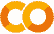<font size=6>!
---

This interface for RVC was originally developed by [r3gm](https://github.com/R3gm) to be used on his Huggingface space. I simply made this version colab-compatible so anyone can run it locally on their own Google account.

## 1️⃣ - How to Use this Notebook

1. Click the arrow to the right of the "**Connect**" button, then click `Change runtime type`.

   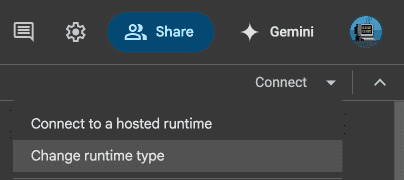

2. Change the hardware accelerator to `v2-8 TPU`, then click "**Save**."

   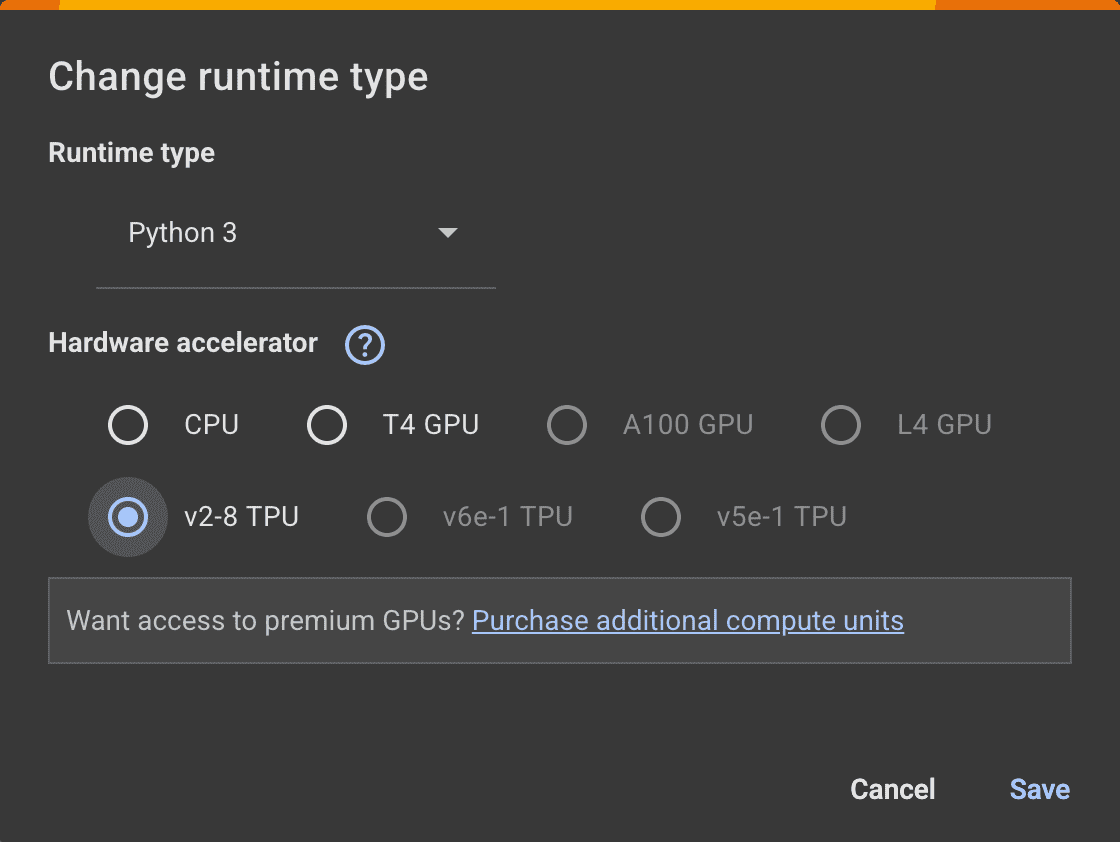

2. Click "**Connect**" near the top-right corner of the screen.

   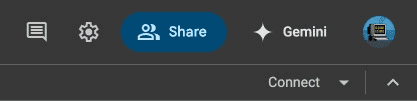

2. Wait a couple moments for your instance load. The button should now be replaced with two graphs (your instance's resources). If you see this, then you did everything properly!

3. Run each cell by clicking the ▶️ play buttons on the left side of every code cell, starting from the first.

4. **Be patient!** Some steps (like environment setup or model loading) may take a ~~minute or two~~ fuck ton of time.

5. Once you see this message:

```
Running on public URL: https://**************.gradio.live
```

Click that link to open RVC⚡ZERO in a new tab.

---

## 2️⃣ - Using the Web UI

1. Select the audio file.

  <font size="1" color="#919191">(That part was kind of obvious...)</font>

2. Load your model's **.pth** and **.index** files in their corresponding boxes, or alternatively check the `URL-to-Model` box to paste a link.

3. Change settings *only* if needed since your output might otherwise sound strange.

4. Check the `Denoise` or `Reverb` boxes if you want to remove ambience or reverb from the original audio.

5. Hit the <font color="#c01c5c">**Inference**</font> button.

Wait for processing; your result will appear at the bottom for download or playback.

---

## 📂 Outputs
Converted files are stored in the output folder and can be played or downloaded directly from the web UI.

---

## 🙋 Need Support?
If anything breaks or you get lost, first check out the [official RVC GitHub repo](https://github.com/RVC-Project) to see if your problem can be resolved there. Alternatively, use [our issues page](https://github.com/zzryn/rvc-webui/issues) to report a problem; but *please* post a detailed report otherwise I might not be able to help resolve your issue.


# **Setup**
Run this cell first!

In [ ]:
instdir='/content/rvc_zero/'
import pip
from IPython.display import display,HTML
if pip.__version__ != "23.3.1":
  !pip install --upgrade pip==23.3.1
!git lfs install
!git clone https://huggingface.co/spaces/r3gm/rvc_zero
!rm -rf sample_data
!apt-get update -y
!pip install -r {instdir}requirements.txt
!pip install gradio spaces soundfile librosa pydub
!xargs -a {instdir}packages.txt apt-get install -y


# **Run App**
Click this after you have run the **Setup** cell. You may need to click `↳ 1 cell hidden` to view the gradio link.

In [ ]:
!cd {instdir} && sed -i 's/share=False/share=True/' app.py && python app.py